# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### File path

In [2]:
path=r'C:\Users\evras\Desktop\Projects\Project A6'

##### Setting up the data frame

In [5]:
#bringing in the clean file
df_bnb=pd.read_pickle(os.path.join(path,'01 Data','02 Altered','us_airbnb_1_clean.pkl'))

In [6]:
#checking
df_bnb.head()

,listing_id,listing_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,city,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,None,28804,35.65146,-82.62792,Asheville,Private room,60,1,138,16/02/20,1.14,1,0
1,80905,French Chic Loft,427027,None,28801,35.59779,-82.55540,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,None,28801,35.60670,-82.55563,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,None,28806,35.57864,-82.59578,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0
4,160594,Historic Grove Park,769252,None,28801,35.61442,-82.54127,Asheville,Private room,125,30,58,19/10/15,0.52,1,0


In [7]:
#yay, nice and shiney. fresh and clean.
#also, just incase it was a consern of anyone's, the numbers in neightbourhood are zipcodes.

# Vizual Explorations

I'll start with making a sub frame actaully. Just so we can ignore the columns that wont mean anything. I think we'll leave out __listing_id, listing_name, host_id, nightbourhood_group, latitude, and longitude__. Since the .corr() function more or less ignores non-numeric values I'll just leave some in there so I can look at them later.

In [8]:
df_sub=df_bnb[['neighbourhood','city','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']]

In [9]:
df_sub.head()

,neighbourhood,city,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,28804,Asheville,Private room,60,1,138,16/02/20,1.14,1,0
1,28801,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288
2,28801,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298
3,28806,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0
4,28801,Asheville,Private room,125,30,58,19/10/15,0.52,1,0


In [10]:
#lets do a regular corr just for fun and to see what it is pulling out.
df_sub.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.003609,-0.072526,-0.077624,0.043073,0.035141
minimum_nights,-0.003609,1.000000,-0.079866,-0.124401,0.075282,0.078951
number_of_reviews,-0.072526,-0.079866,1.000000,0.757339,-0.119599,0.052045
reviews_per_month,-0.077624,-0.124401,0.757339,1.000000,-0.133794,0.028295
calculated_host_listings_count,0.043073,0.075282,-0.119599,-0.133794,1.000000,0.162437
availability_365,0.035141,0.078951,0.052045,0.028295,0.162437,1.000000


In [11]:
#well thats ... dissapointing but not all together surprising. we'll need to look at some categoricals later.

# Correlation heatmap

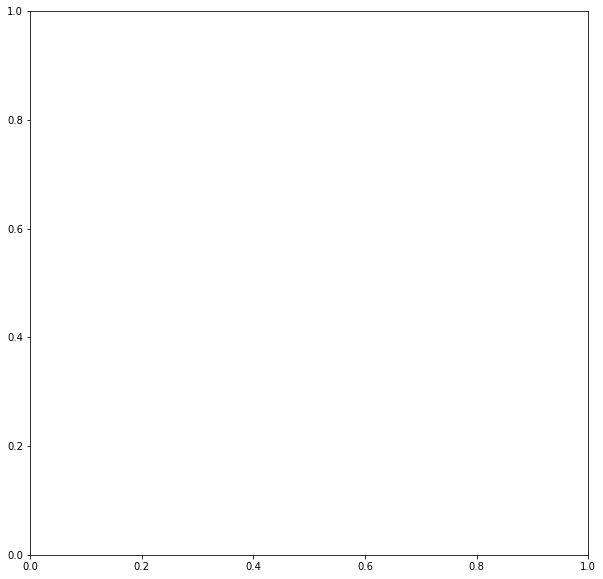

In [12]:
#first step is to create the empty subplot
f,ax=plt.subplots(figsize=(10,10)) #I'm gonna stick with the 10x10 the lesson uses because it's a nice size.

In [13]:
#look at that nice square.
#next step is to set up the actual heatmap to the subset I made earlier
corrmap=sns.heatmap(df_sub.corr(),annot=True,ax=ax)

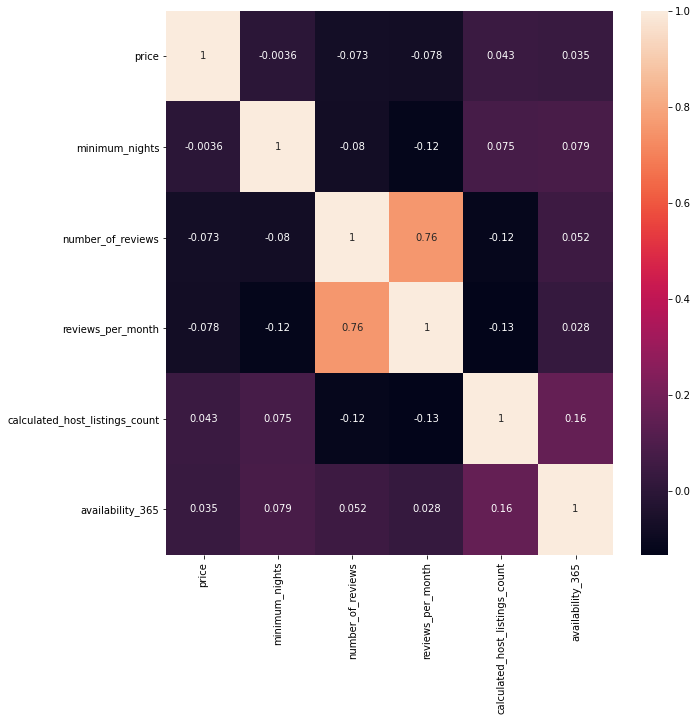

In [14]:
#and now let's take a look!
corrmap.figure

In [19]:
#ok let's export this one
corrmap.figure.savefig(os.path.join(path,'03 Analysis', 'Viz','airbnb_corr_map.png'),dpi=300,bbox_inches='tight')

### Thoughts
Well, there isn't a lot of correlation going on here. Which could be expected I suppose. I think most of the correlations will show up when we get into comparing things to the categorical sections. Like location and room types. I am a little interested to see that there is almost no correlation between the number of listings an account has and prices. I was expecting _something_ to be there. The only thing that has a correlation is __reviews_per_month__ and __number_of_reviews__ but that is just because one is the result of the other. __reviews_per_month__ is just __number_of_reviews__ divided by the number of months a listing has been up. Which it just now occurs to me, might be way to figure that out how long a listing has been up. Just divide the number of reviews by the reviews per month, assuming there are reviews (and there isn't always). Something to play with later maybe.

# Scatterplot
I'm going to go ahead and do this for the two reviews columns, just because they _have_ a correlation. I'm also going to look at __price__ and __reviews per month__, as well as __minimum_nights__ and __availibitily_365__. Both of those two sets have weak correlation, but I'm still curoius to see it mapped out.

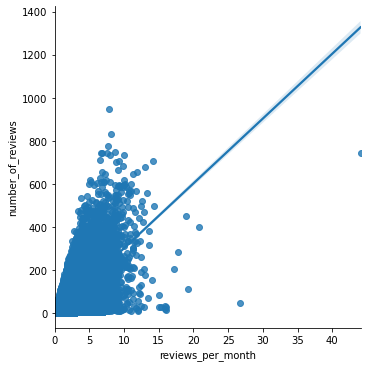

In [21]:
#first one will be the reivews
#in the interest of not having totally messy charts that means nothing, I'm going to do the random sampling thing
dev=np.random.rand(len(df_sub))<=0.7
big= df_sub[dev]
small=df_sub[~dev]
sns.lmplot(x='reviews_per_month',y='number_of_reviews', data=small)

Well, that's still a mess and while this isn't perhaps _helpful_ exactly, it does at least give us an idea of where things fall. One thing we can tell from this though is that the longer a listing has been around the more reviews it tends to have. Which makes sense obviously, but might not always be true. There is one guy up there at almost 10k reviews and probably at around 6 or 7 reviews per month, which suggest a listing that has been up for _years_. So that's interesting.

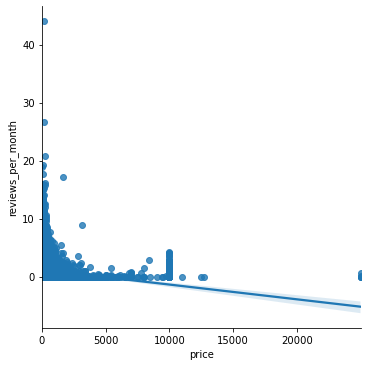

In [26]:
sns.lmplot(x='price',y='reviews_per_month',data=small)

Well, no shock there I guess. As the price goes up, the number of people renting would likely drop which means the amount of reviews would drop too. There is a very definite comfort zone though in the corner. Based on that I would say there is a sweet spot for pricing in terms of rentals. Accoring to inside bnb (the data source) they estimate about a 50% review rate. So about half the people who rent will leave reviews. That feels _awfully_ generous, another number I saw was more like 30-40. Which feels more right. Still, that does give us another category to consider later on. I might be adding a couple of columns at a later date and coming back to this ...

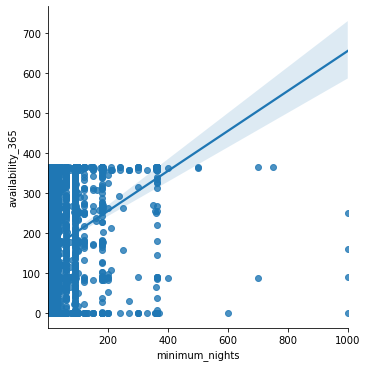

In [27]:
sns.lmplot(x='minimum_nights',y='availability_365',data=small)

The idea that there are even so many listings where you need to rent for more than like five days minimum is insane to me. But here we are. There are _so many listings_ that were over a few days that I realized there was no way it was a mistake. Still, it wuold seem that the more night you set the minimum too the more days available you have over the next year. Which is hardly a shock. My guess is this is some sort of shady buisness move, in order to give specific listings to specific people. Could be all sort of things. Still, in the moment this isn't a usefull corelation, especilly give how many fall outside the trend line.

# Pair Plots
This should be interesting

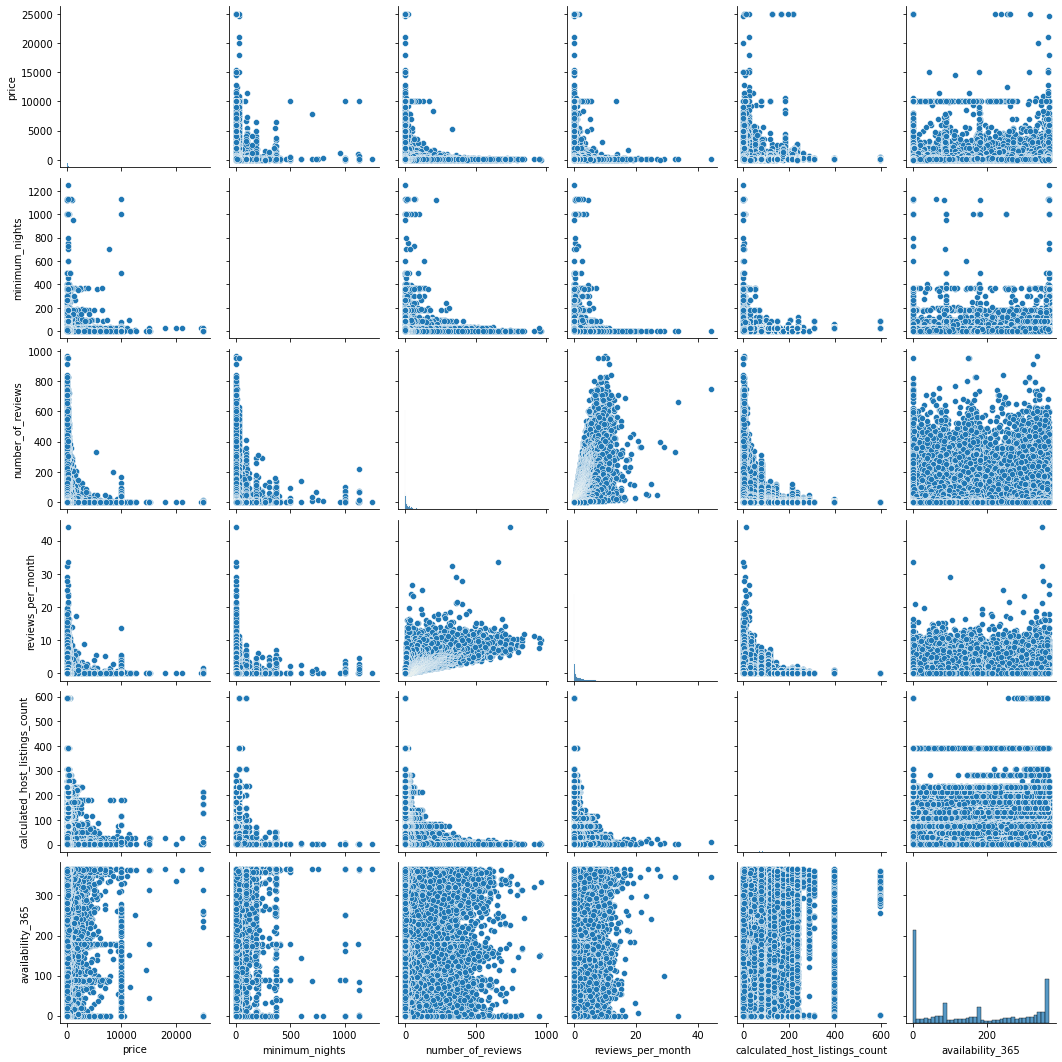

In [30]:
sns.pairplot(df_sub)

So it took a little bit of just staring at this madness to get anything out of it. I would call your attention to the columns that refer to __price__ and __minimum_nights__ and just crazy similar they are as you move up the through the charts. This suggests to me that some combination of those two are actauly pretty impactful on the rest of the variables. I think I'll look at __price__ and the __calculated_host_listings_count__ together in the next bit.

# Catplot

I'm going to sort of follow along the lesson's part because it makes sence to break price down into the 25, 50 and 75 percentile chunks. Assuming of course it works out that neatly (it wont).

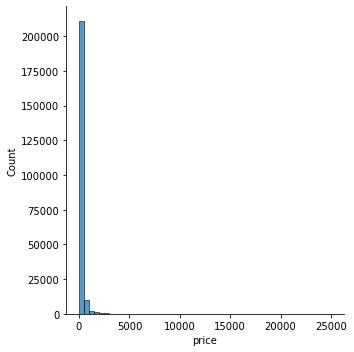

In [41]:
sns.displot(df_sub['price'], bins=50)

In [42]:
#ok well that was not useful, I'll just use .describe() to figure out the percentiles.
#also it would seem distplot is going to be removed in some future version of seaborn, so it told me to change it to displot.
df_sub['price'].describe()

count    226000.000000
mean        219.720097
std         570.387886
min           0.000000
25%          75.000000
50%         121.000000
75%         201.000000
max       24999.000000
Name: price, dtype: float64

In [43]:
#ok, so we'll break it into Low Price is <=75  Average Price >75, <201. and High Price will be >=201.
df_sub.loc[df_sub['price']<=75,'price_range']= 'Low Price'
df_sub.loc[(df_sub['price']>75)&(df_sub['price']<201),'price_range']= 'Average Price'
df_sub.loc[df_sub['price']>=201,'price_range']= 'High Price'

C:\Users\evras\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\evras\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\evras\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [45]:
#should I have not done those all at once? I don't remeber ever getting that message before ...
df_sub.head()

,neighbourhood,city,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
0,28804,Asheville,Private room,60,1,138,16/02/20,1.14,1,0,Low Price
1,28801,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,High Price
2,28801,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Low Price
3,28806,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Average Price
4,28801,Asheville,Private room,125,30,58,19/10/15,0.52,1,0,Average Price


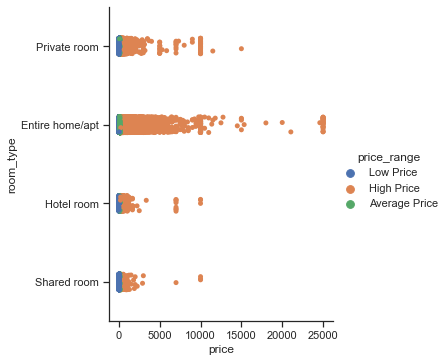

In [53]:
sns.set(style='ticks')
g=sns.catplot(x='price',y='room_type',hue='price_range',data=df_sub)

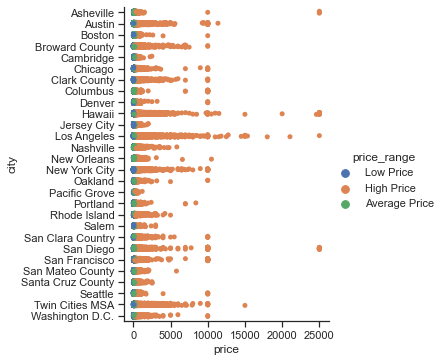

In [71]:
sns.set(style='ticks')
g=sns.catplot(x='price',y='city',hue='price_range',data=df_sub)

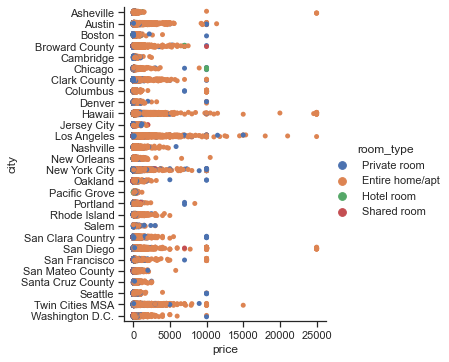

In [74]:
sns.set(style='ticks')
g=sns.catplot(x='price',y='city',hue='room_type',data=df_sub)

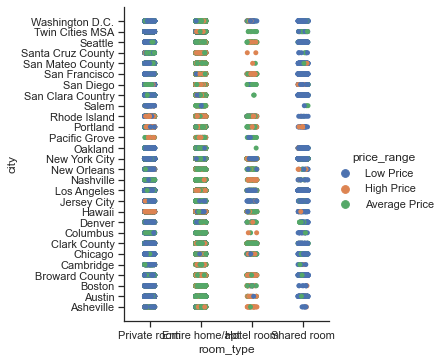

In [76]:
sns.set(style='ticks')
g=sns.catplot(x='room_type',y='city',hue='price_range',data=df_sub)

So from the ones I just did we can see a couple of things. We can see that "Entrie home/apartment" listings tend to be the most expensive _and_ most frequent. We can also a few stand outs in terms of number of listings and the price points in the second two charts. On that point we can also see that there are _far_ more "Entire home" listings in big cities, and it really seems like Chicago is almost the only one that has a hotel room on Airbnb. Interesting stuff.

# Question Reflections

So there is no meaningful correleation between number of listings per account and pricing. At most I think it would seem that having a lot of listings just means you can spread you're pricing around.

I'm not really sure any one region is more expensive than the other based on this set. It would seem it really boils down to the cities themselves. Speaking of which, either LA or Hawaii have the most listings, it's hard to tell. However Those two are at the top both in listing number and in who gets the most expensive. Ashville and San Deigo also have listings in the _absolutly absurd_ 25k range. I would say the top five in no particular order are Los Angeles, Hawaii, New York City, Twin Cities, and Broward County.

The data definetly suggests that room type has _an_ effect on pricing. However it isn't universal, nor is it particularly consistent.

There is no correlation between price and number of reviews.

There doesn't appear to be a meaningful connection between availability and any other given factor.

# Hypothesis

I'm going to need to go back in and add a couple of columns I think. Test to see if how long a listing has been up has any bearing on pricing. However, I don't expect it too.
I think the one hypothesis I have is that there is some seasonal external impact on pricing and possibly availability. Unfortunatly this data set doesn't really have enough time related information to test that theory. Even the source doesn't, as it happens. So instead we'll keep out eyes on if city and room type have a meaningful impact on price when considered together. I think there is some promise there based on the last one. But it's a little hard to tell.